### Récupération du dataset

In [1]:
import kagglehub as kh
import pandas as pd

# Télécharger le dataset dans un dossier local
dataset_ref = "uciml/glass"
path = kh.dataset_download(dataset_ref)

# Localiser le fichier CSV dans le dossier téléchargé
csv_file = f"{path}/glass.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file)


d:\Sources\DS-Machine-Learning\Classification\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
display(df)
df.info()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Gestion des doublons et valeurs manquantes

In [3]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

1
(213, 10)
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


### Vérification de la validité des données

In [4]:
# Vérifier l'ensemble des valeurs distinctes pour les données catégorielles
print(df['Type'].unique())

[1 2 3 5 6 7]


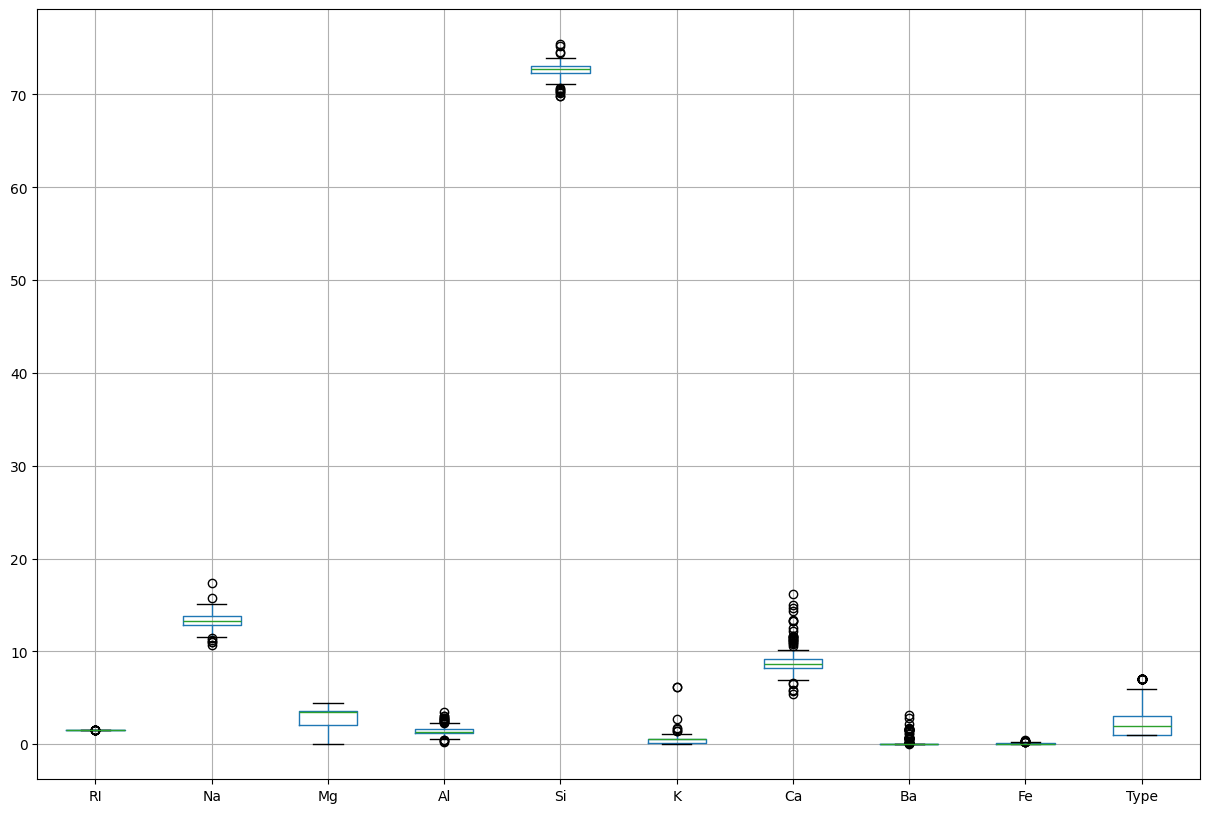

In [5]:
# Vérifier la distribution des données quantitatives avec des boxplots
import matplotlib.pyplot as plt
df.boxplot(column=df.drop('Type',axis=1).columns.name, figsize=(15, 10))
plt.show()
# Les données semblent cohérentes

### Exploration / analyse des relations entre les données

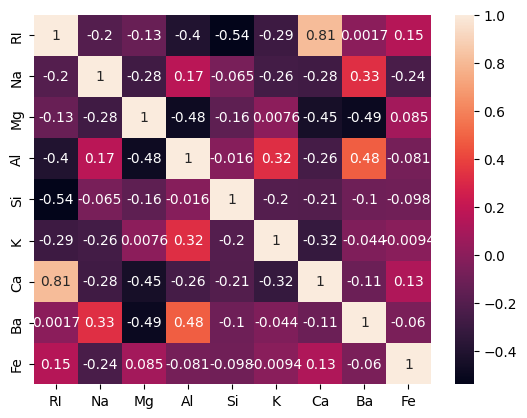

In [6]:
# Afficher les corrélations entre les variables quantitatives
import seaborn as sns
sns.heatmap(df.drop('Type',axis=1).corr(), annot=True)
plt.show()

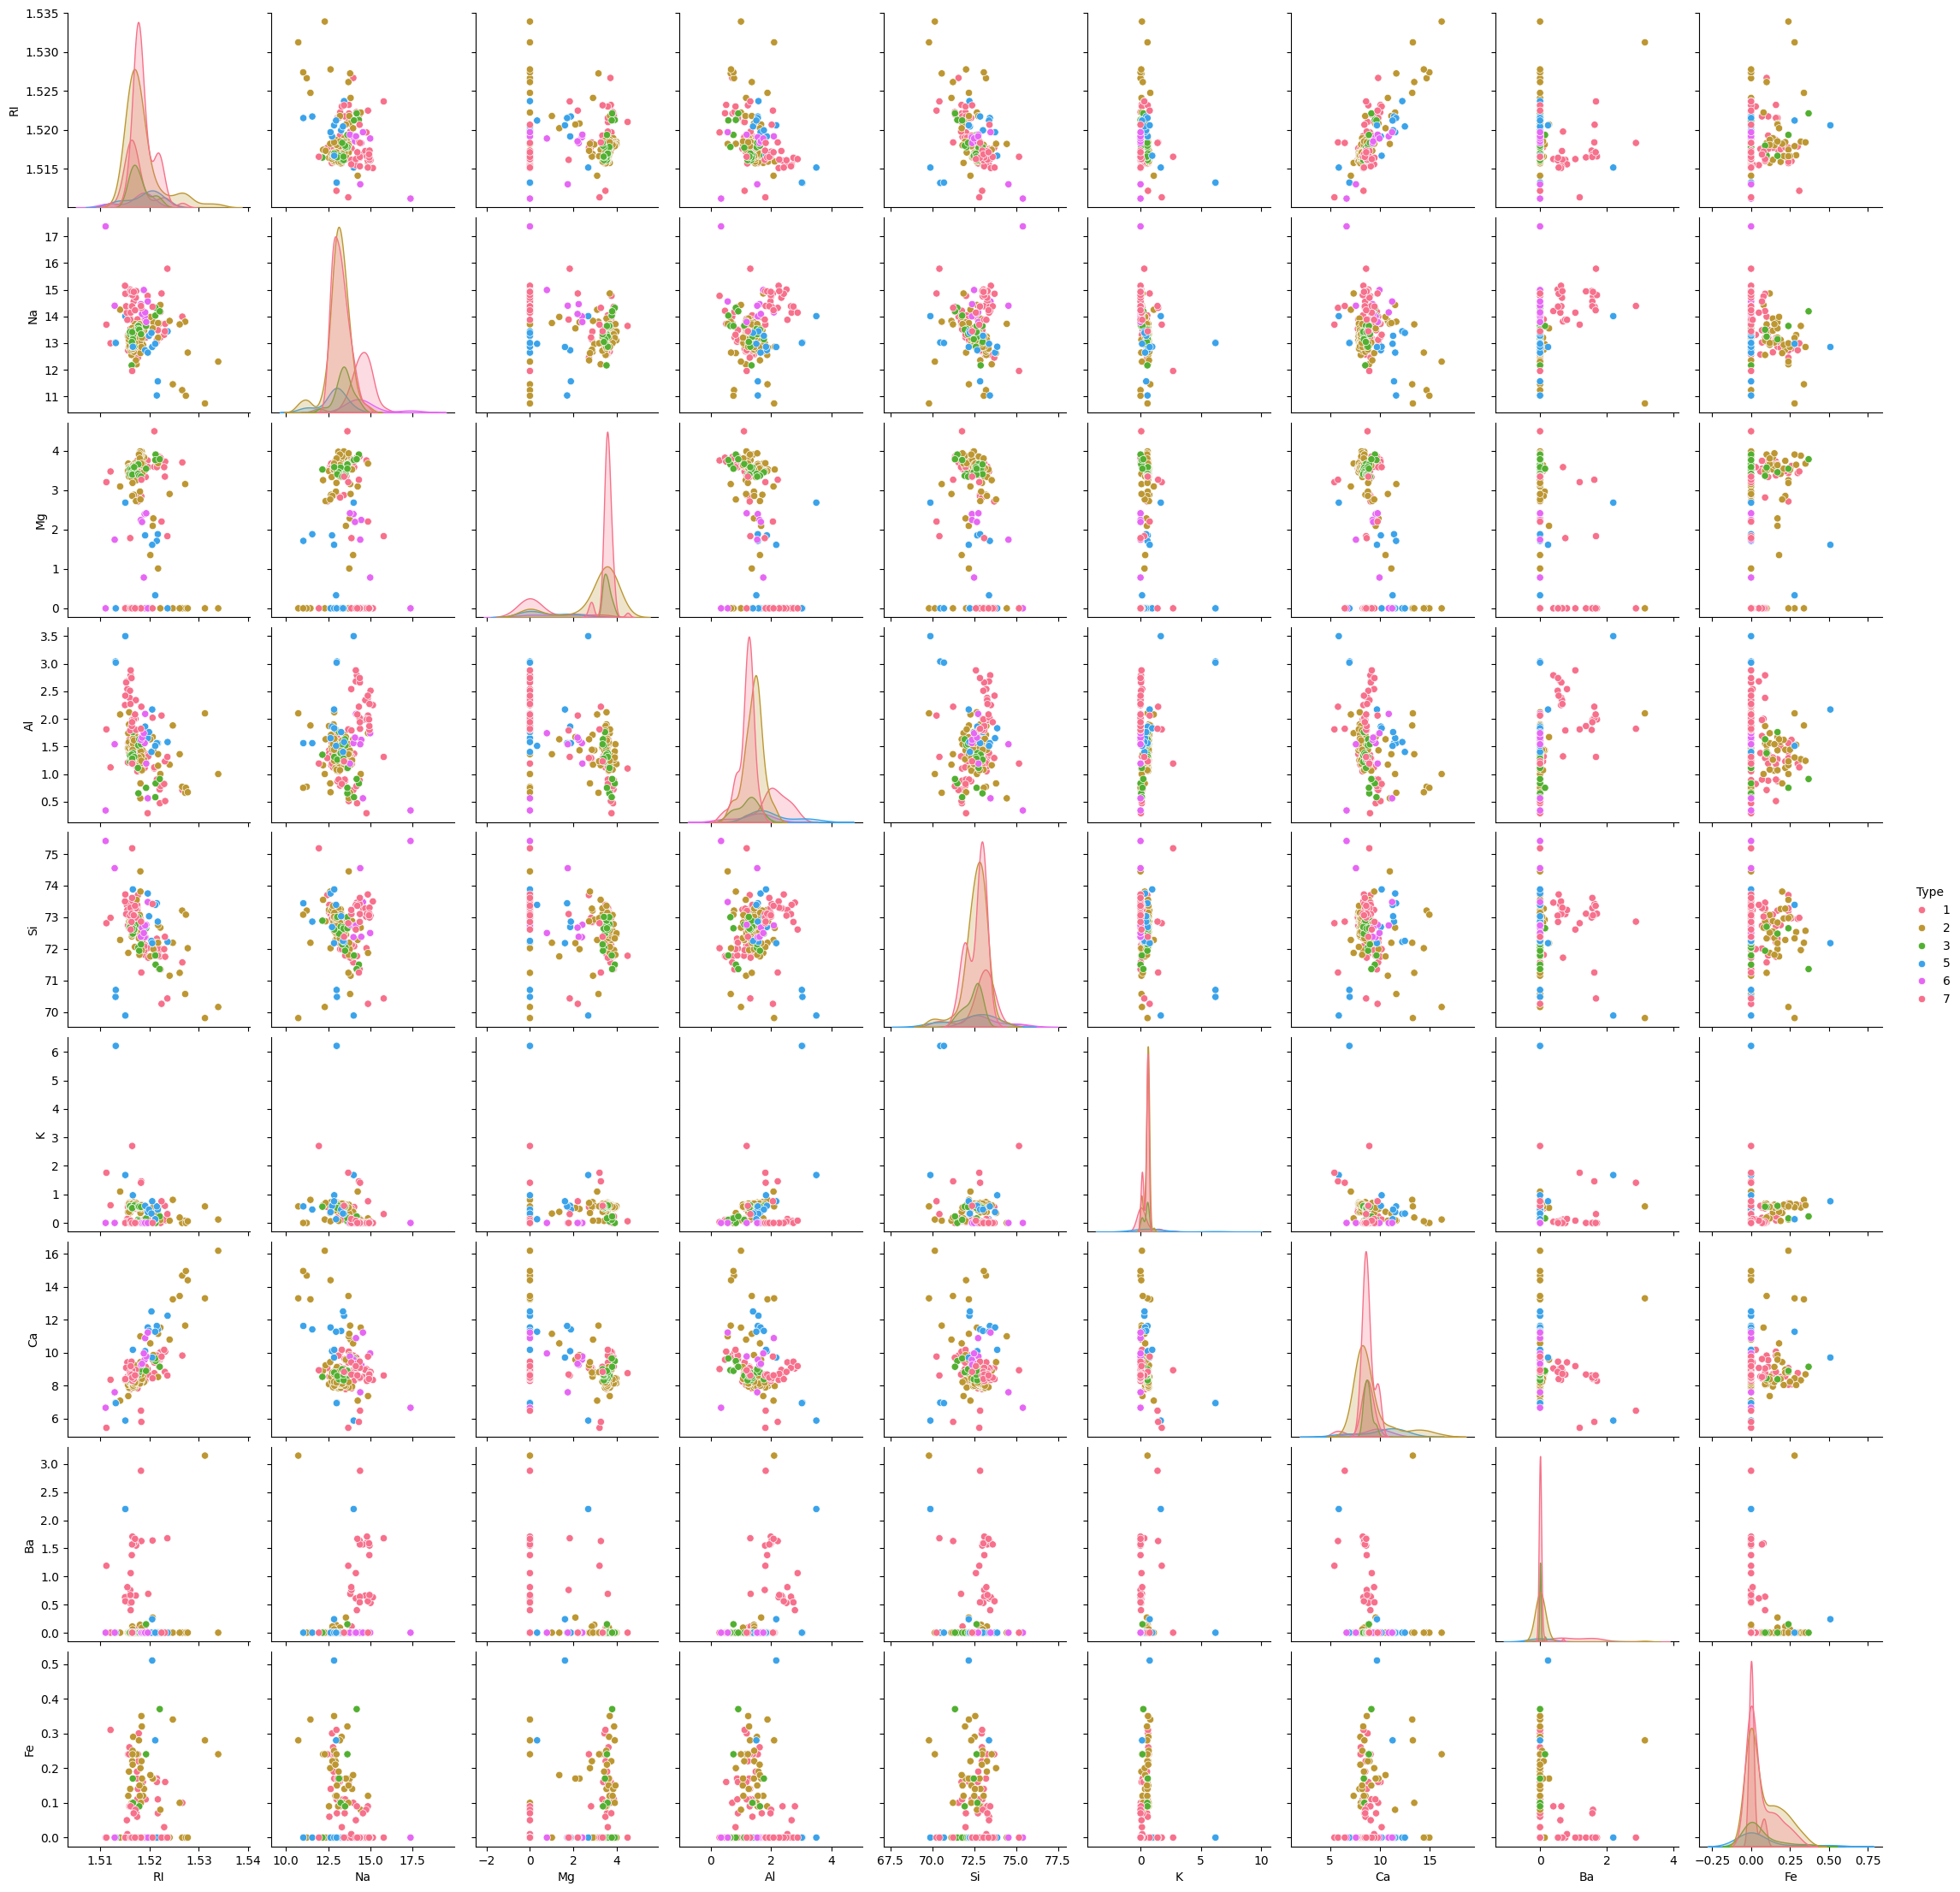

In [7]:
# Afficher un pairplot pour visualiser les corrélations
sns.pairplot(df, hue='Type',palette='husl')
plt.show()

### Preprocessing

In [8]:
# Séparation features / target
X = df.drop(columns='Type')
y = df['Type']

# Séparation training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entraînement du modèle Random Forest

In [9]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_jobs=-1,random_state=321)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=321)

### Evaluation du modèle

In [10]:
# Prédire les classes sur le jeu de test
y_pred = clf.predict(X_test)

# Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Afficher l'accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Afficher le rapport de classification
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

[[10  0  0  0  0  0]
 [ 3 11  0  1  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]
0.8372093023255814
              precision    recall  f1-score   support

           1       0.77      1.00      0.87        10
           2       0.79      0.73      0.76        15
           3       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.84        43
   macro avg       0.88      0.86      0.86        43
weighted avg       0.85      0.84      0.84        43



### Bonus : courbe de gains cumulés

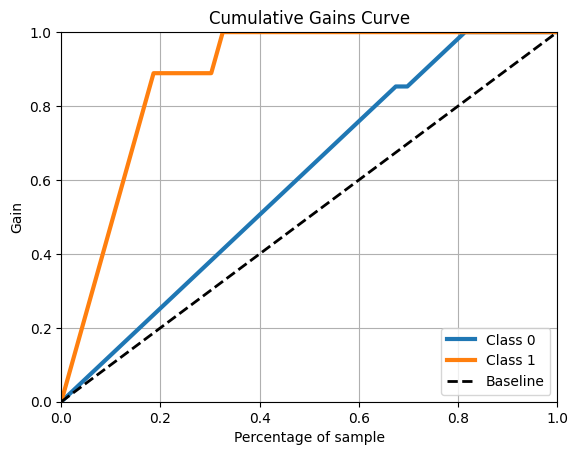

In [29]:
# Courbe de gains cumulés pour la classe 7
from scikitplot.metrics import plot_cumulative_gain
import numpy as np

y_test_class7 = y_test.apply(lambda x: 1 if x == 7 else 0)
y_probas = clf.predict_proba(X_test)
# Extraire de y_probas les probabilités pour la classe 7 et pour l'ensemble des autres classes
y_probas_cls7 = np.zeros((y_probas.shape[0], 2))
# Probas classe 7
y_probas_cls7[:, 1] = y_probas[:, 5]
# Probas autres classes
y_probas_cls7[:, 0] = 1 - y_probas_cls7[:, 1]
# Afficher la courbe de gains cumulés
plot_cumulative_gain(y_test_class7, y_probas_cls7)
plt.show()

# Avec 30% des données de test, on arrive à cibler 80% des verres de type 2